In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [19]:
###Copy this for other files for full database combined
df06 = pd.read_csv("./Data/RB Research Data - 2006-2007.csv")
df07 = pd.read_csv("./Data/RB Research Data - 2007-2008.csv")
df08 = pd.read_csv("./Data/RB Research Data - 2008-2009.csv")
df09 = pd.read_csv("./Data/RB Research Data - 2009-2010.csv")
df10 = pd.read_csv("./Data/RB Research Data - 2010-2011.csv")
df11 = pd.read_csv("./Data/RB Research Data - 2011-2012.csv")
df12 = pd.read_csv("./Data/RB Research Data - 2012-2013.csv")
df13 = pd.read_csv("./Data/RB Research Data - 2013-2014.csv")
df14 = pd.read_csv("./Data/RB Research Data - 2014-2015.csv")
df15 = pd.read_csv("./Data/RB Research Data - 2015-2016.csv")
df16 = pd.read_csv("./Data/RB Research Data - 2016-2017.csv")
df17 = pd.read_csv("./Data/RB Research Data - 2017-2018.csv")
df18 = pd.read_csv("./Data/RB Research Data - 2018-2019.csv")
df19 = pd.read_csv("./Data/RB Research Data - 2019-2020.csv")
df20 = pd.read_csv("./Data/RB Research Data - 2020-2021.csv")
df21 = pd.read_csv("./Data/RB Research Data - 2021-2022.csv")
df22 = pd.read_csv("./Data/RB Research Data - 2022-2023.csv")
df = pd.concat([df06, df07, df08, df09, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22])
df = df[df['AAV Adjusted'] != -1]
df = df[df["Games Played"] > 8]
df

,Player Name,Team,Year,Rookie Contract (Y/N),Contract Length,Total Pay,Yearly Pay (AAV),Team Payroll,Player Percentage of Payroll,Games Played,...,Player Percentage of Touchdowns,AAV Adjusted,Total Pay Adjusted,Payroll Adjusted,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 0
0,Edgerrin James,ARI,2006.0,N,4.0,30000000.0,7.500000e+06,102000000.0,0.073529,16.0,...,0.206897,1.142250e+07,4.569000e+07,155346000.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Warrick Dunn,ATL,2006.0,N,3.0,12450000.0,4.150000e+06,102000000.0,0.040686,16.0,...,0.166667,6.320450e+06,1.896135e+07,155346000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Jamal Lewis,BAL,2006.0,N,3.0,26000000.0,8.666667e+06,102000000.0,0.084967,17.0,...,0.281250,1.319933e+07,3.959800e+07,155346000.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Willis McGahee,BUF,2006.0,Y,5.0,7053000.0,1.410600e+06,102000000.0,0.013829,14.0,...,0.214286,2.148344e+06,1.074172e+07,155346000.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Deshaun Foster,CAR,2006.0,N,3.0,14500000.0,4.833333e+06,102000000.0,0.047386,14.0,...,0.115385,7.361167e+06,2.208350e+07,155346000.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,Christian McCaffrey,SF,2022.0,N,4.0,64063500.0,1.601588e+07,206082457.0,0.077716,14.0,...,0.260000,1.680065e+07,6.720261e+07,216180497.4,NaN,NaN,NaN,NaN,NaN,NaN
28,Kenneth Walker III,SEA,2022.0,Y,4.0,8441581.0,2.110395e+06,215796566.0,0.009780,16.0,...,0.238095,2.213805e+06,8.855218e+06,226370597.7,NaN,NaN,NaN,NaN,NaN,NaN
29,Leonard Fournette,TB,2022.0,N,3.0,21000000.0,7.000000e+06,202960773.0,0.034489,17.0,...,0.193548,7.343000e+06,2.202900e+07,212905850.9,NaN,NaN,NaN,NaN,NaN,NaN
30,Derrick Henry,TEN,2022.0,N,4.0,50000000.0,1.250000e+07,209793874.0,0.059582,16.0,...,0.406250,1.311250e+07,5.245000e+07,220073773.8,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
vets = df[df["Rookie Contract (Y/N)"] == "N"]
vets = vets[vets["Games Played"] > 8]
rooks = df[df["Rookie Contract (Y/N)"] == "N"]
rooks = rooks[rooks["Games Played"] > 8]

In [6]:
players = df.value_counts("Player Name")
players_1 = players[players > 1]
len(players_1)
#for name, count in players_greater_than_one.items():
#    print(f"Player: {name}, Count: {count}")

113

In [7]:
rush = df.groupby('Year')['Player Percentage of Rushing Yards'].mean()
result = rush
if 2008 in result.index and 2022 in result.index:
    initial_value = result.loc[2006]
    final_value = result.loc[2020]

    # Check if the initial value is not 0
    if initial_value != 0:
        # Calculate the percentage increase
        percentage_increase = ((final_value - initial_value) / initial_value) * 100
        print(f'Percentage increase from 2006 to 2022: {percentage_increase:.2f}%')
    else:
        print("Initial value is 0. Cannot calculate percentage increase.")
else:
    print("One or both of the specified years are not present in the result.")

Percentage increase from 2006 to 2022: -23.61%


In [8]:
rush

Year
2006.0    0.634448
2007.0    0.616418
2008.0    0.558477
2009.0    0.558223
2010.0    0.565577
2011.0    0.544508
2012.0    0.564847
2013.0    0.529496
2014.0    0.513575
2015.0    0.510926
2016.0    0.531970
2017.0    0.522176
2018.0    0.518207
2019.0    0.553349
2020.0    0.484675
2021.0    0.458771
2022.0    0.510990
Name: Player Percentage of Rushing Yards, dtype: float64

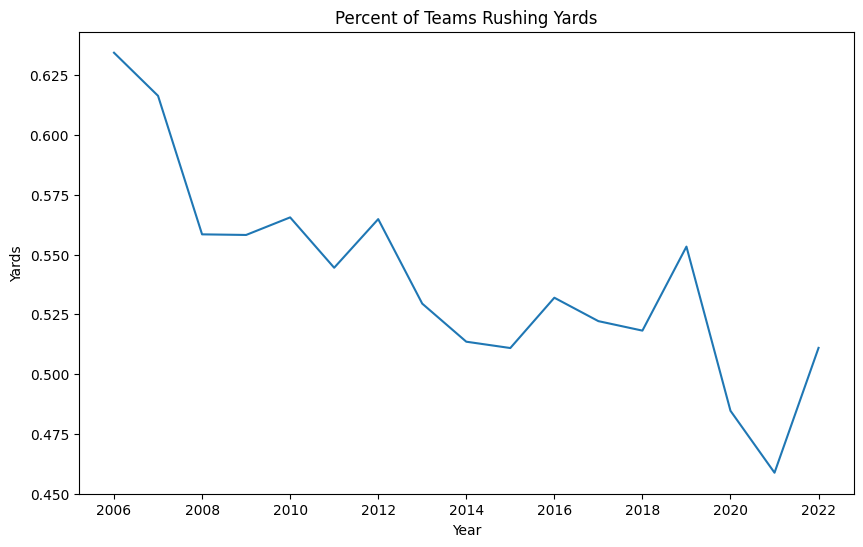

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(rush)
#plt.plot(rush['Year'], rush['Player Percentage of Rushing Yards'], marker='o', linestyle='-', color='b')

plt.xlabel('Year')
plt.ylabel('Yards')
#plt.legend()
plt.title('Percent of Teams Rushing Yards')

plt.show()

In [13]:
team = df.groupby('Year')['Team Rushing Yards'].mean().reset_index()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


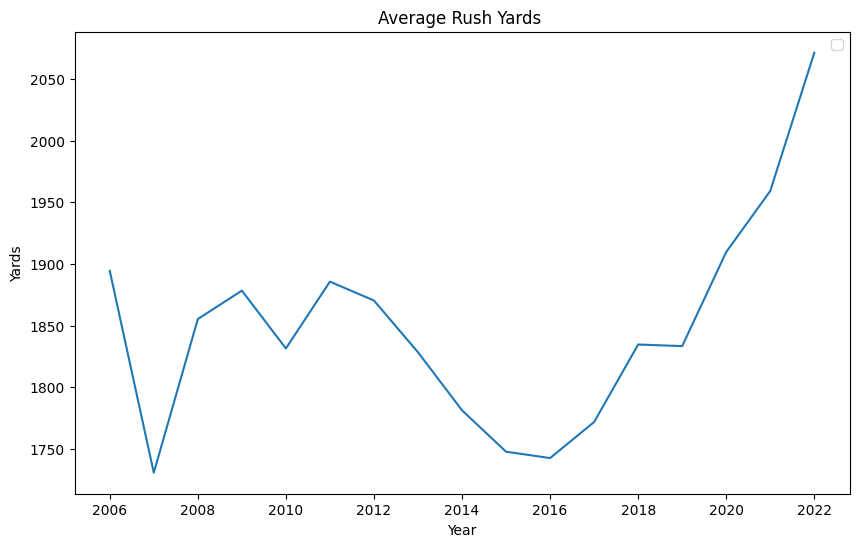

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(team['Year'], team['Team Rushing Yards'])
#plt.plot(rush['Year'], rush['Player Percentage of Rushing Yards'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Yards')
plt.legend()
plt.title('Average Rush Yards ')
plt.show()

Year
2006.0    0.634448
2007.0    0.616418
2008.0    0.558477
2009.0    0.558223
2010.0    0.565577
2011.0    0.544508
2012.0    0.564847
2013.0    0.529496
2014.0    0.513575
2015.0    0.510926
2016.0    0.531970
2017.0    0.522176
2018.0    0.518207
2019.0    0.553349
2020.0    0.484675
2021.0    0.458771
2022.0    0.510990
Name: Player Percentage of Rushing Yards, dtype: float64

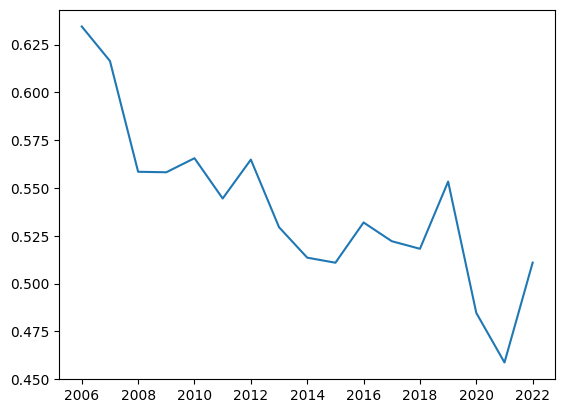

In [38]:
#temp = df.groupby('Year')['All-Purpose Yards'].mean()
#temp = df.groupby('Year')['Rush Yards'].mean()
#temp = df.groupby('Year')['Recieving Yards'].mean()
#temp = df.groupby('Year')['Receiving TDs'].mean()
#temp = df.groupby('Year')['Player Percentage of Offensive Yards'].mean() #this one
#temp = df.groupby('Year')['Player Percentage of Touchdowns'].mean()
#temp = df.groupby('Year')['Player Percentage of Rushing Yards'].mean() #this one

plt.plot(temp)
temp